# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [2]:
data = pd.read_excel('default of credit card clients.xls')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Preprocessing

In [3]:
data.describe(include = 'all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [4]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [5]:
data['SEX'].value_counts()

female    18112
male      11888
Name: SEX, dtype: int64

In [6]:
data['SEX'] = data['SEX'].map({'female': 0, 'male': 1})

In [7]:
data['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [8]:
data = pd.get_dummies(data, prefix=['dm'], columns=['EDUCATION'])

In [9]:
data.head()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,dm_graduate school,dm_high school,dm_not educated,dm_others,dm_university
0,1,20000,0,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1
1,2,120000,0,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1
2,3,90000,0,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,1
3,4,50000,0,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,1
4,5,50000,1,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,0,1


In [10]:
data['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

In [11]:
labelencoder = LabelEncoder()

data['MARRIAGE_LE'] = labelencoder.fit_transform(data['MARRIAGE'])
data.head()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,dm_graduate school,dm_high school,dm_not educated,dm_others,dm_university,MARRIAGE_LE
0,1,20000,0,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,0
1,2,120000,0,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,2
2,3,90000,0,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,1,2
3,4,50000,0,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,1,0
4,5,50000,1,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,0,1,0


In [12]:
data['MARRIAGE_LE'].value_counts()

2    15964
0    13659
1      377
Name: MARRIAGE_LE, dtype: int64

In [13]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'dm_graduate school', 'dm_high school', 'dm_not educated', 'dm_others',
       'dm_university', 'MARRIAGE_LE'],
      dtype='object')

In [14]:
data = data[['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'dm_graduate school', 'dm_high school', 'dm_not educated', 'dm_others',
       'dm_university', 'MARRIAGE_LE',  'default']]

In [15]:
data.head()

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dm_graduate school,dm_high school,dm_not educated,dm_others,dm_university,MARRIAGE_LE,default
0,20000,0,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,0,0,1,0,1
1,120000,0,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,0,0,1,2,1
2,90000,0,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1,2,0
3,50000,0,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1,0,0
4,50000,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,0,0


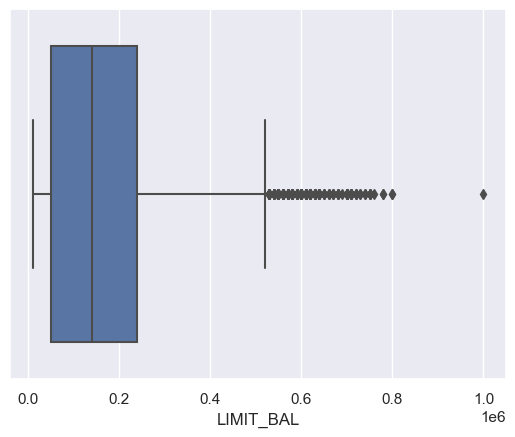

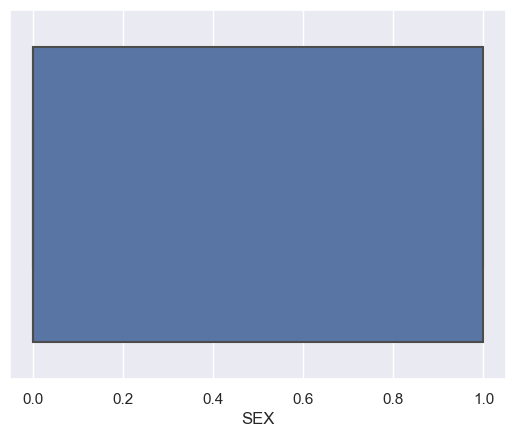

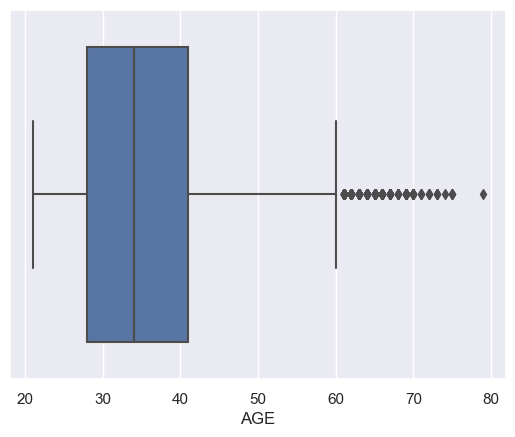

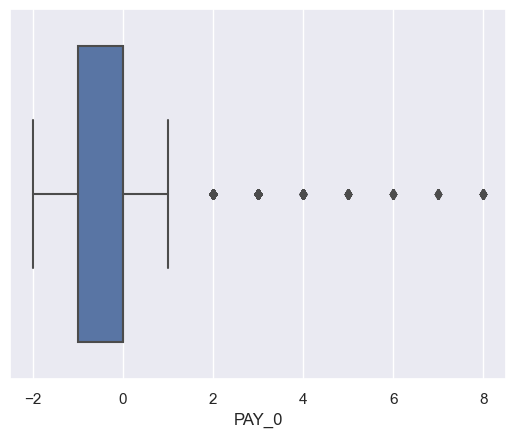

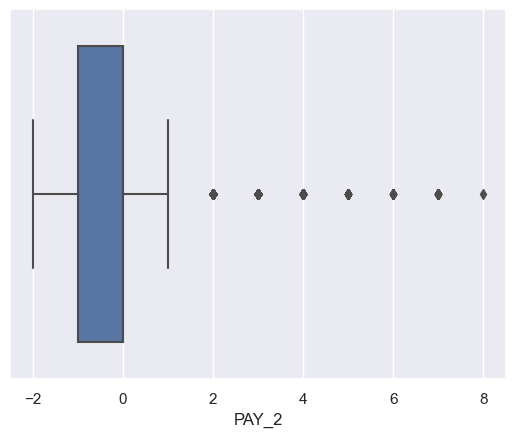

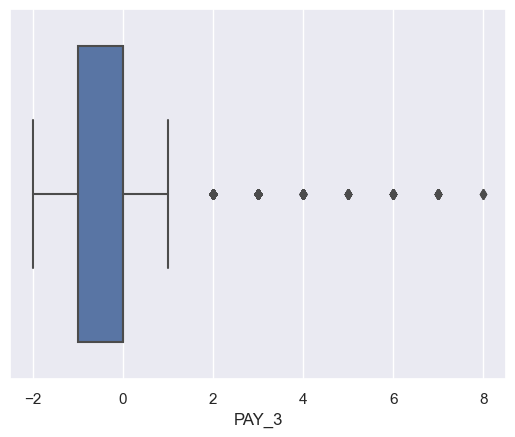

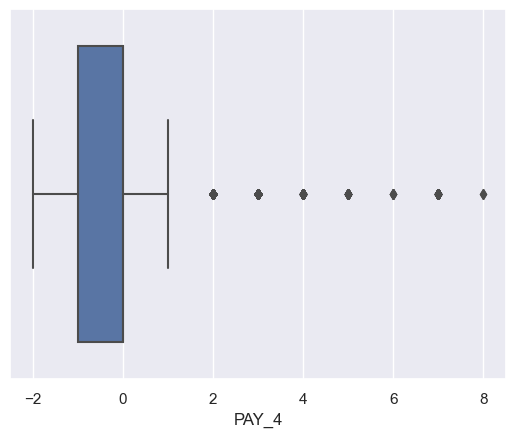

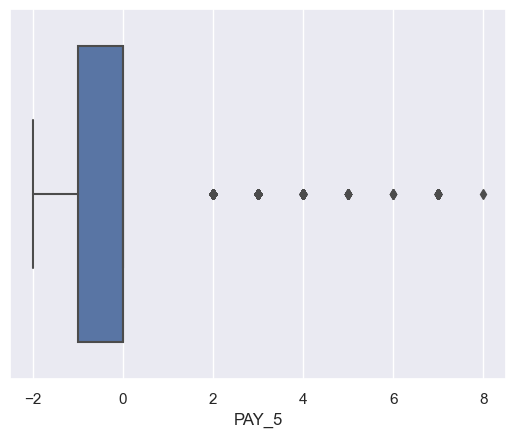

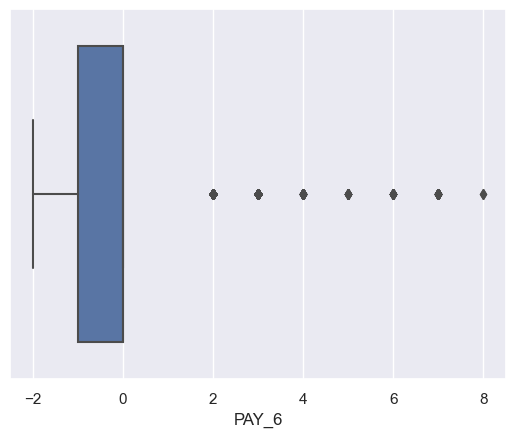

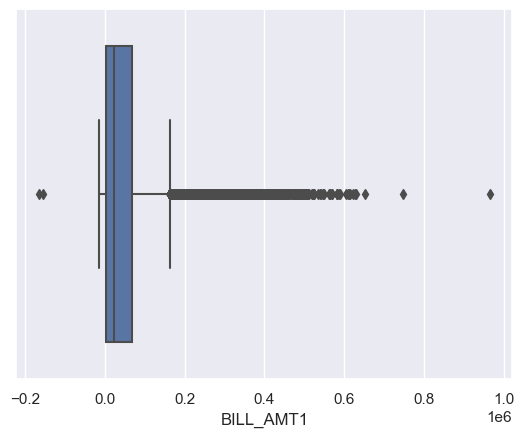

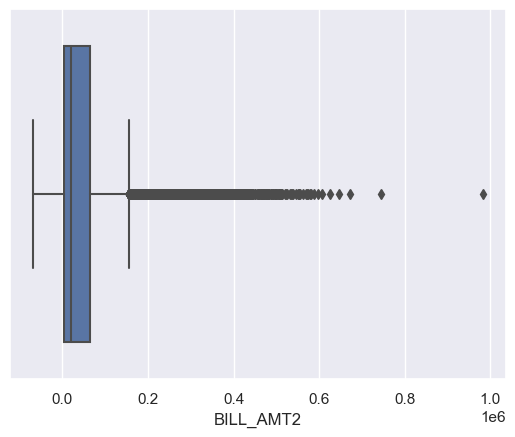

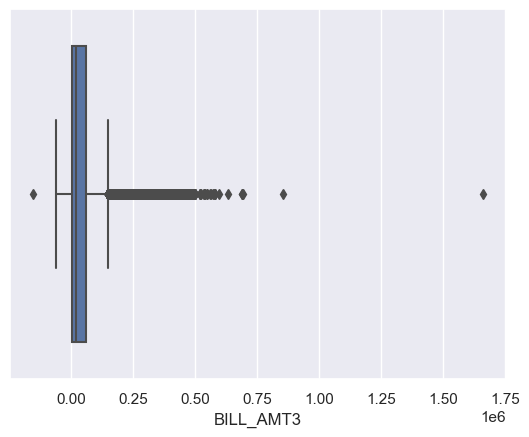

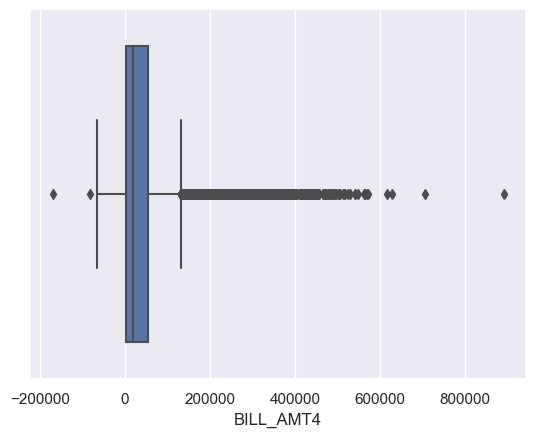

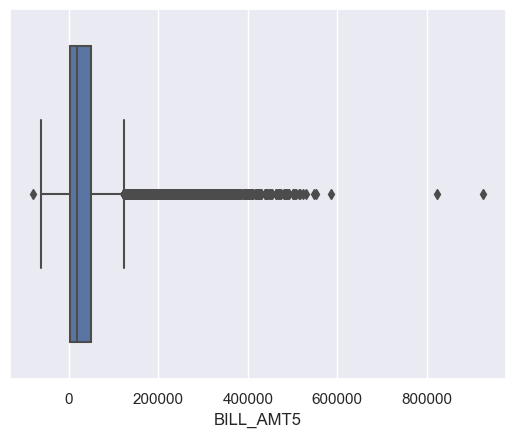

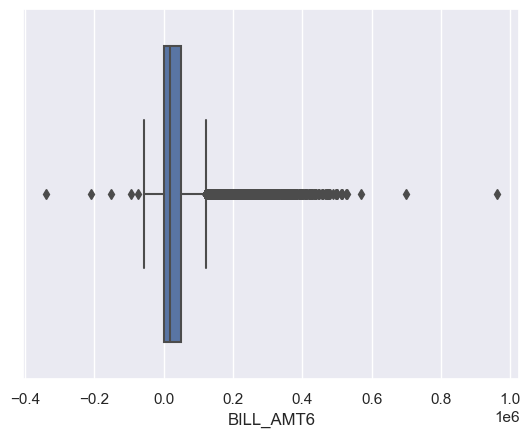

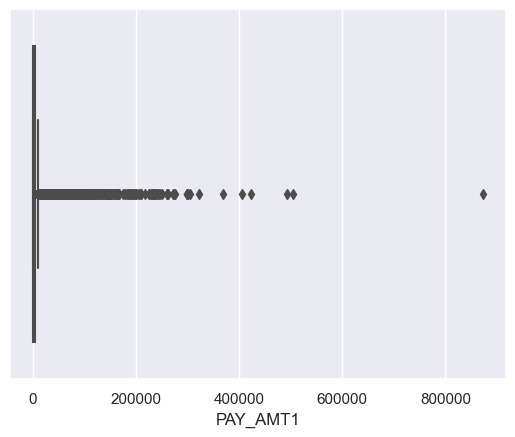

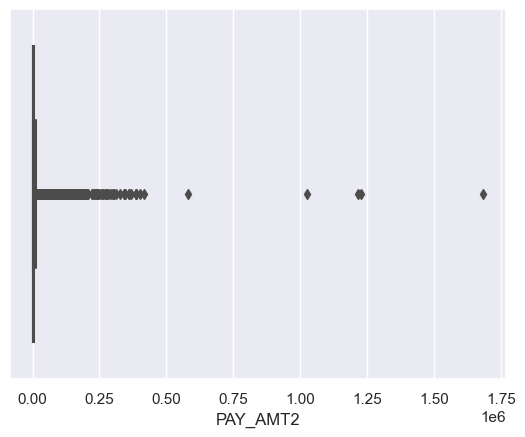

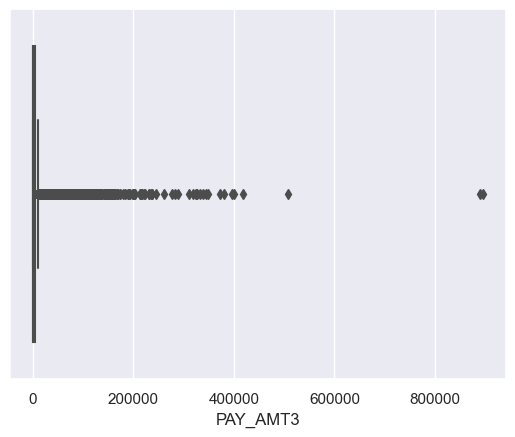

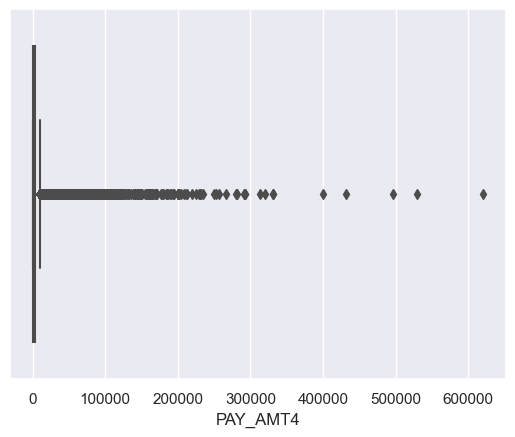

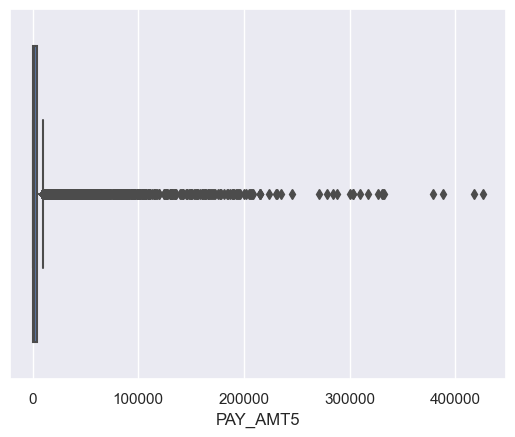

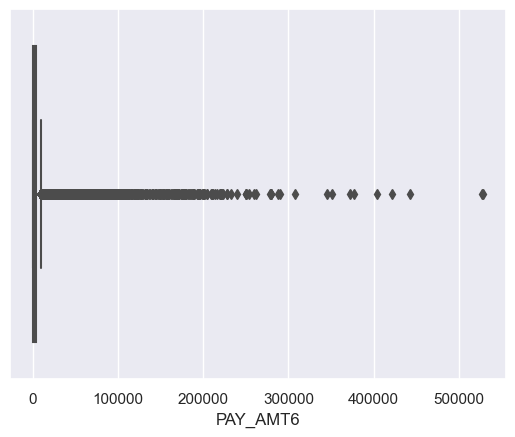

In [16]:
for i in data.iloc[:,0:-7]:
    sns.boxplot(data = data, x = data[i])
    plt.show()

In [17]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

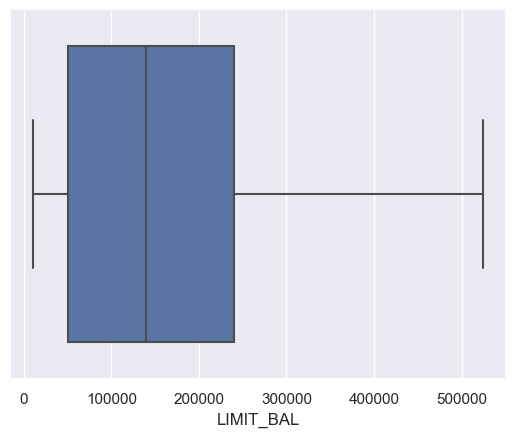

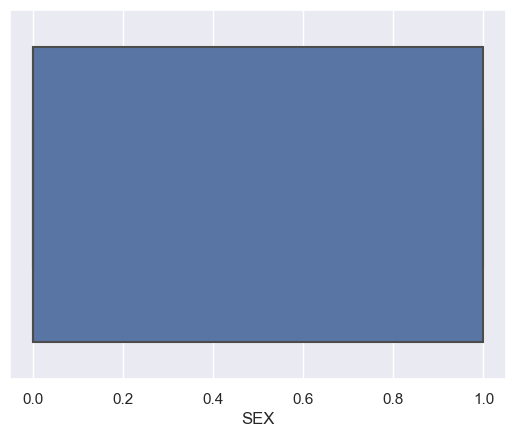

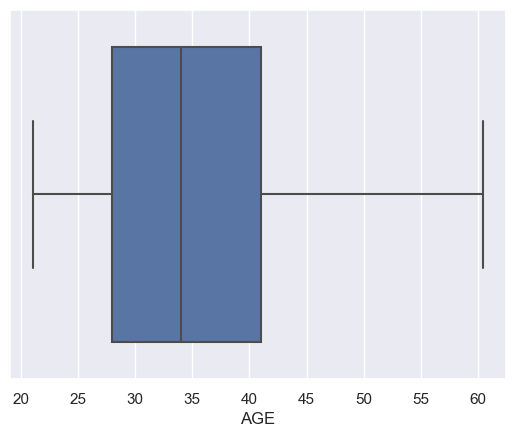

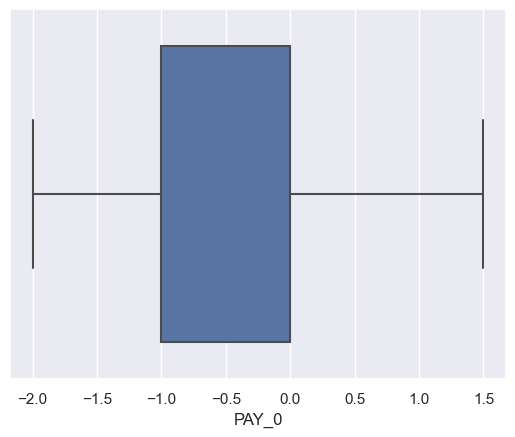

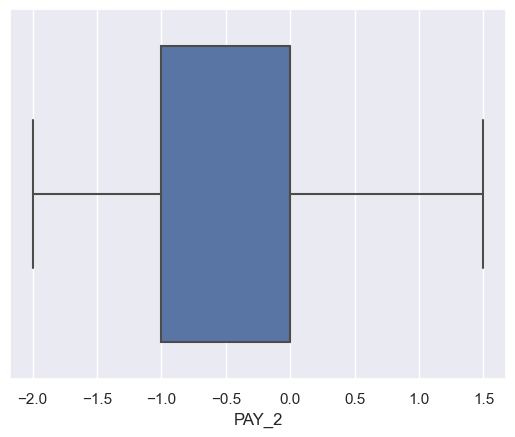

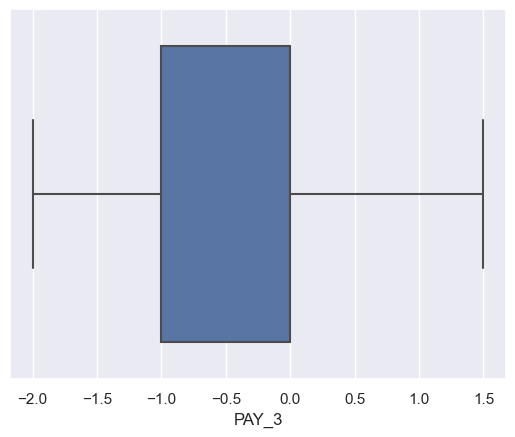

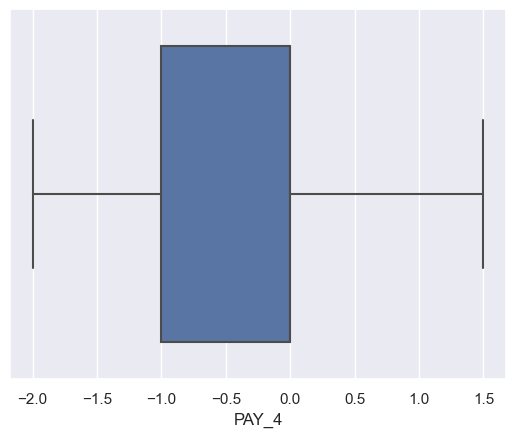

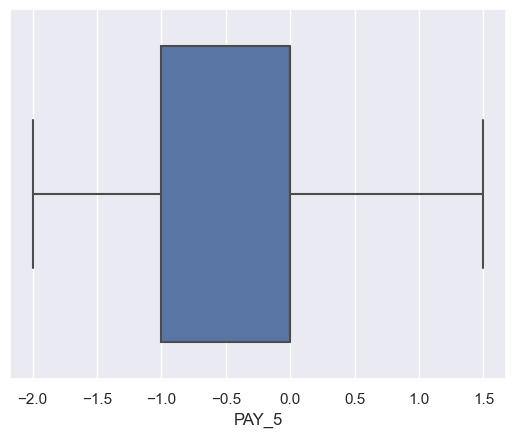

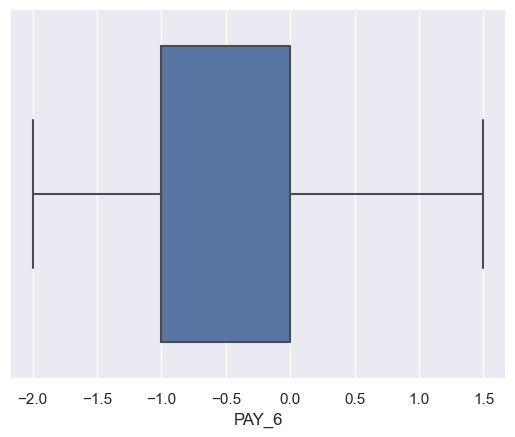

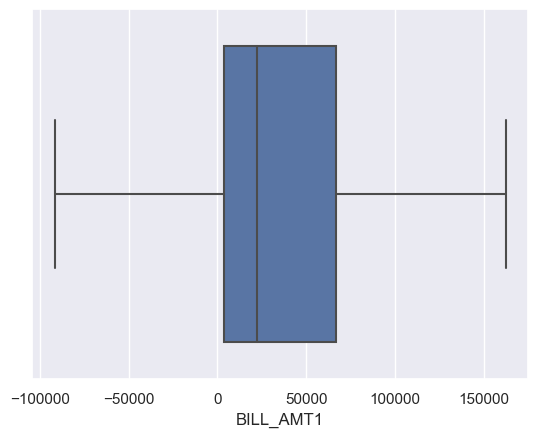

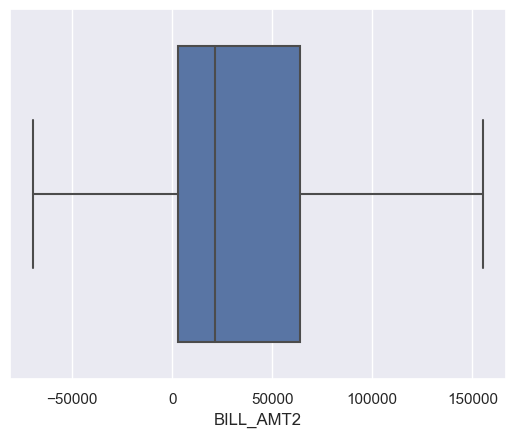

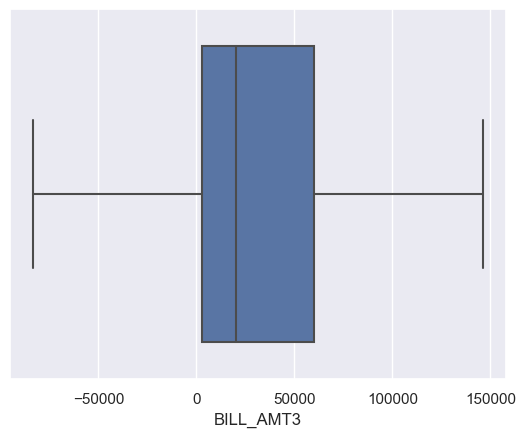

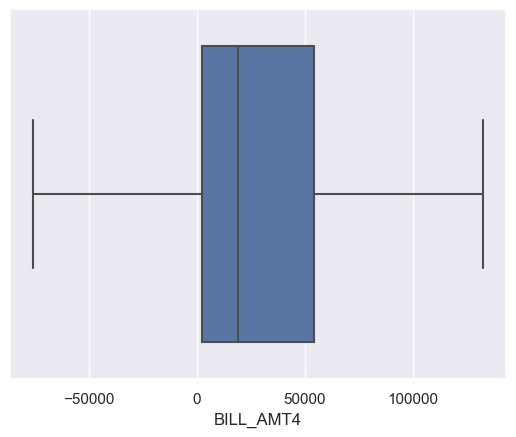

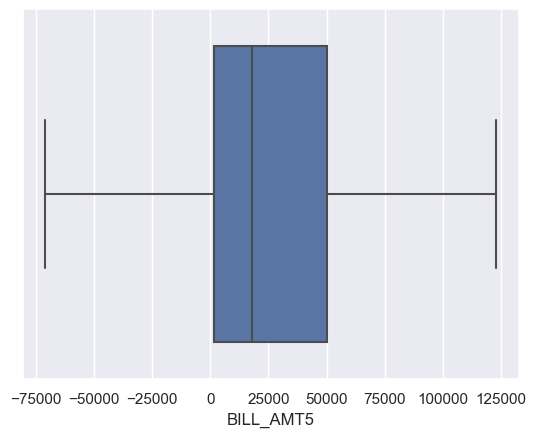

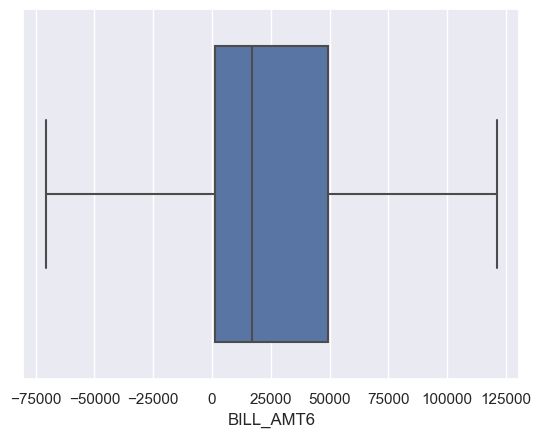

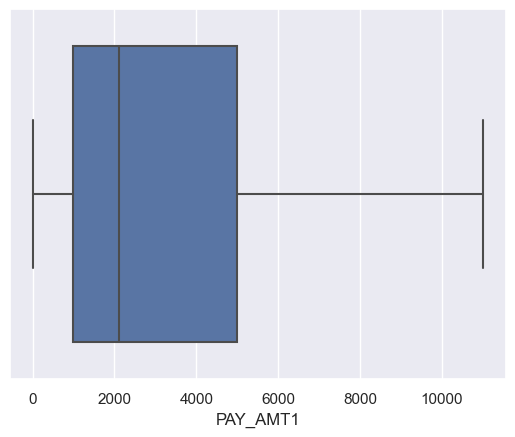

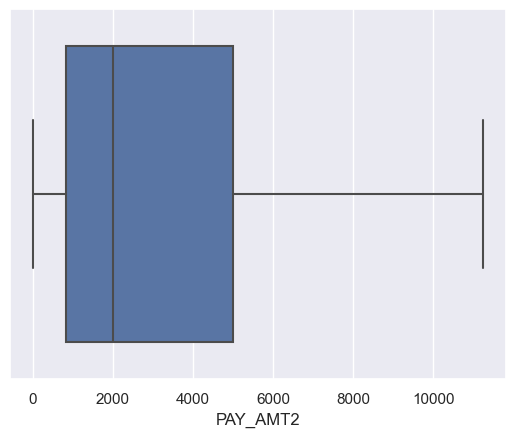

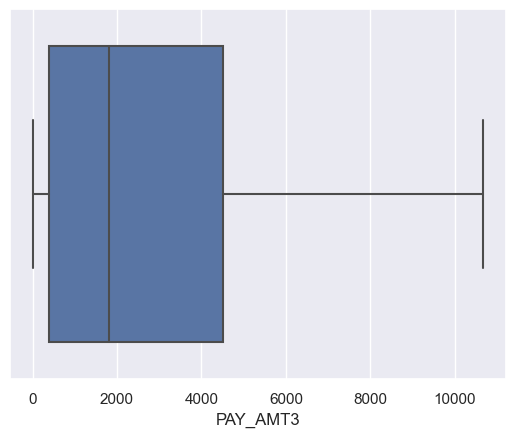

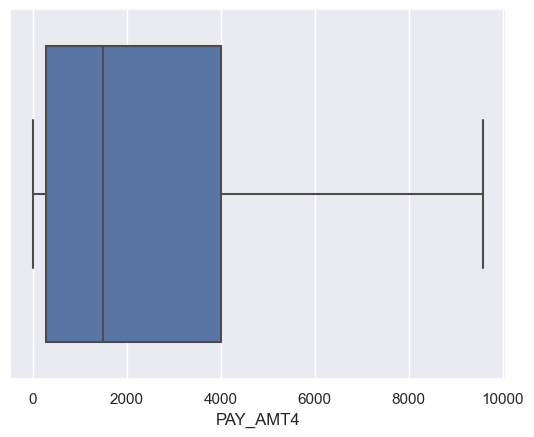

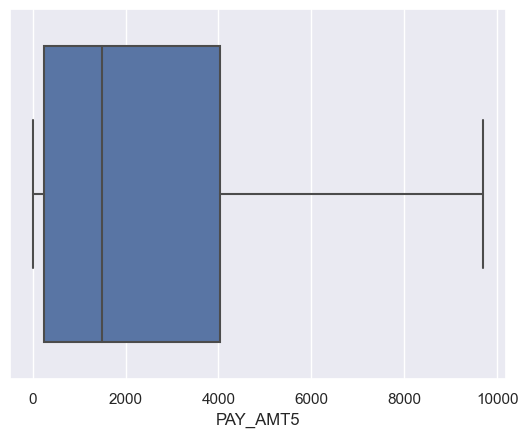

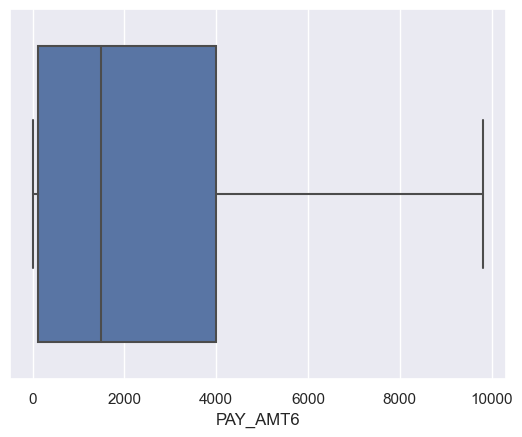

In [18]:
for i in data.iloc[:,0:-7]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [19]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dm_graduate school',
       'dm_high school', 'dm_not educated', 'dm_others', 'dm_university',
       'MARRIAGE_LE', 'default'],
      dtype='object')

# VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
       'dm_high school', 'dm_not educated', 'dm_others', 'dm_university',
       'MARRIAGE_LE']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,3.674551,LIMIT_BAL
1,1.545825,SEX
2,1.847274,PAY_0
3,3.758714,PAY_2
4,4.783164,PAY_3
5,4.231278,PAY_4
6,2.741070,PAY_6
7,3.157251,BILL_AMT1
8,4.094778,PAY_AMT1
9,3.999705,PAY_AMT2


In [21]:
data = data[['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_6', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
       'dm_high school', 'dm_not educated', 'dm_others', 'dm_university',
       'MARRIAGE_LE', 'default']]
data.head()

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dm_high school,dm_not educated,dm_others,dm_university,MARRIAGE_LE,default
0,20000.0,0.0,1.5,1.5,-1.0,-1.0,-2.0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1
1,120000.0,0.0,-1.0,1.5,0.0,0.0,1.5,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,0,0,1,2,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,1,2,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,1,0,0
4,50000.0,1.0,-1.0,0.0,-1.0,0.0,0.0,8617.0,2000.0,11250.5,10000.0,9000.0,689.0,679.0,0,0,0,1,0,0


In [22]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6',
       'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'dm_high school', 'dm_not educated', 'dm_others',
       'dm_university', 'MARRIAGE_LE', 'default'],
      dtype='object')

In [23]:
data.corr()

,LIMIT_BAL,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dm_high school,dm_not educated,dm_others,dm_university,MARRIAGE_LE,default
LIMIT_BAL,1.000000,-0.025538,-0.281256,-0.308840,-0.296653,-0.275536,-0.237806,0.198285,0.343157,0.353506,0.358593,0.349563,0.354400,0.371924,-0.140990,0.008469,0.012292,-0.148458,-0.098799,-0.154380
SEX,-0.025538,1.000000,0.055758,0.071145,0.066619,0.058835,0.041439,0.030498,0.003137,-0.006234,-0.012512,-0.008921,-0.011855,-0.025256,0.007650,0.007738,-0.009995,-0.025353,0.030927,0.039961
PAY_0,-0.281256,0.055758,1.000000,0.645076,0.559973,0.528837,0.476768,0.251773,-0.102186,-0.095138,-0.087057,-0.067292,-0.061694,-0.076801,0.059483,-0.009215,-0.023464,0.102198,0.018953,0.291685
PAY_2,-0.308840,0.071145,0.645076,1.000000,0.786833,0.694651,0.615124,0.345197,-0.044281,-0.010027,-0.011084,0.002347,0.009338,-0.003035,0.065874,-0.016724,-0.027807,0.131326,0.028297,0.235276
PAY_3,-0.296653,0.066619,0.559973,0.786833,1.000000,0.792073,0.653343,0.319670,0.114352,-0.040379,0.000133,0.021869,0.028235,0.009207,0.064798,-0.015294,-0.028965,0.125117,0.033868,0.208608
PAY_4,-0.275536,0.058835,0.528837,0.694651,0.792073,1.000000,0.719471,0.319552,0.087344,0.126888,-0.016672,0.037965,0.055232,0.040393,0.058565,-0.013124,-0.025908,0.120729,0.035123,0.186960
PAY_6,-0.237806,0.041439,0.476768,0.615124,0.653343,0.719471,1.000000,0.316668,0.088892,0.091165,0.113354,0.156453,0.045744,0.078345,0.040705,-0.022109,-0.030477,0.106960,0.035966,0.156596
BILL_AMT1,0.198285,0.030498,0.251773,0.345197,0.319670,0.319552,0.316668,1.000000,0.466516,0.424701,0.392170,0.403331,0.394699,0.379730,-0.012855,-0.013696,0.042466,0.048586,-0.019525,-0.029033
PAY_AMT1,0.343157,0.003137,-0.102186,-0.044281,0.114352,0.087344,0.088892,0.466516,1.000000,0.538179,0.515902,0.490235,0.481460,0.465544,-0.047505,0.006744,0.020356,-0.045907,-0.009253,-0.143442
PAY_AMT2,0.353506,-0.006234,-0.095138,-0.010027,-0.040379,0.126888,0.091165,0.424701,0.538179,1.000000,0.521045,0.505590,0.491160,0.483899,-0.056271,0.010326,0.027315,-0.046231,-0.021684,-0.139699


In [24]:
data = data[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6', 'default']]

In [25]:
data.corr()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,default
LIMIT_BAL,1.000000,-0.281256,-0.308840,-0.296653,-0.275536,-0.237806,-0.154380
PAY_0,-0.281256,1.000000,0.645076,0.559973,0.528837,0.476768,0.291685
PAY_2,-0.308840,0.645076,1.000000,0.786833,0.694651,0.615124,0.235276
PAY_3,-0.296653,0.559973,0.786833,1.000000,0.792073,0.653343,0.208608
PAY_4,-0.275536,0.528837,0.694651,0.792073,1.000000,0.719471,0.186960
PAY_6,-0.237806,0.476768,0.615124,0.653343,0.719471,1.000000,0.156596
default,-0.154380,0.291685,0.235276,0.208608,0.186960,0.156596,1.000000


<AxesSubplot:>

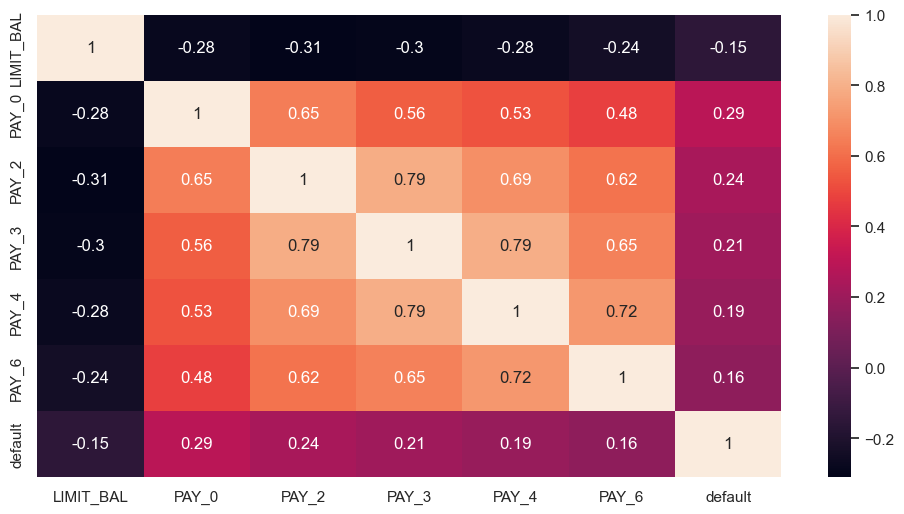

In [26]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot = True)

In [27]:
data.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,default
0,20000.0,1.5,1.5,-1.0,-1.0,-2.0,1
1,120000.0,-1.0,1.5,0.0,0.0,1.5,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0


In [28]:
X = data[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6']]

y = data[['default']]


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [30]:
x_scaled

array([[-1.14808251,  1.6744629 ,  1.74672933, -0.74368092, -0.71787648,
        -1.68533672],
       [-0.36690123, -0.9516787 ,  1.74672933,  0.26086342,  0.31350585,
         1.91958817],
       [-0.60125562,  0.09877794,  0.23429317,  0.26086342,  0.31350585,
         0.37462036],
       ...,
       [-1.06996438,  1.6744629 ,  1.74672933,  1.76767993, -0.71787648,
         0.37462036],
       [-0.67937374,  1.14923458, -0.77399761,  0.26086342,  0.31350585,
        -0.65535818],
       [-0.91372813,  0.09877794,  0.23429317,  0.26086342,  0.31350585,
         0.37462036]])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression

In [32]:
reg = LogisticRegression()

In [33]:
reg.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [34]:
reg.intercept_

array([-1.44952725])

In [35]:
reg.coef_

array([[-0.20755019,  0.64999089,  0.11918961,  0.09725962,  0.0304429 ,
        -0.0417568 ]])

In [36]:
y_pred = reg.predict(x_test)

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [38]:
confusion_matrix

array([[4590,   97],
       [1094,  219]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      4687
           1       0.69      0.17      0.27      1313

    accuracy                           0.80      6000
   macro avg       0.75      0.57      0.58      6000
weighted avg       0.78      0.80      0.75      6000



In [40]:
from sklearn.metrics import roc_auc_score

print('AUC Score:', roc_auc_score(y_test, y_pred)*100)

AUC Score: 57.30490307897378


## Balanced LogisticRegression

In [41]:
reg = LogisticRegression(class_weight='balanced')
reg.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [42]:
y_pred = reg.predict(x_test)

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [44]:
confusion_matrix

array([[2857, 1830],
       [ 395,  918]], dtype=int64)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      4687
           1       0.33      0.70      0.45      1313

    accuracy                           0.63      6000
   macro avg       0.61      0.65      0.59      6000
weighted avg       0.76      0.63      0.66      6000



In [46]:
print('AUC Score:', roc_auc_score(y_test, y_pred)*100)

AUC Score: 65.4360288402837


# DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred = dt.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
confusion_matrix(y_pred, y_test)

array([[4363,  851],
       [ 324,  462]], dtype=int64)

In [52]:
accuracy_score(y_pred, y_test)

0.8041666666666667

In [53]:
from sklearn.metrics import roc_auc_score


print('AUC Score:', roc_auc_score(y_pred, y_test)*100)

AUC Score: 71.22859184169455


In [54]:
Gini = ((roc_auc_score(y_pred, y_test)*2)-1)*100

Gini

42.45718368338911

# Random Forest Classifier - by detault

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [56]:
rfc.fit(x_train, y_train)

C:\Users\nijat\AppData\Local\Temp\ipykernel_11920\2446813824.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestClassifier()

In [57]:
y_predRF = rfc.predict(x_test)

In [58]:
confusion_matrix(y_predRF, y_test)

array([[4336,  824],
       [ 351,  489]], dtype=int64)

In [59]:
accuracy_score(y_predRF, y_test)*100

80.41666666666667

In [60]:
print('AUC Score:', roc_auc_score(y_predRF, y_test)*100)

AUC Score: 71.12264673311185


In [61]:
Gini = ((roc_auc_score(y_predRF, y_test)*2)-1)*100

Gini

42.2452934662237

# Random Forest classification with feature importance selection

In [62]:
from sklearn.feature_selection import SelectFromModel

In [63]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\feature_selection\_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [64]:
# Define the column names

col_names = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6']

# Create the dataframe
x_train = pd.DataFrame(x_train, columns=col_names)

# Print the dataframe
x_train.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6
0,-0.679374,0.098778,0.234293,0.260863,0.313506,0.374620
1,-1.069964,0.098778,0.234293,0.260863,0.313506,0.374620
2,0.101808,0.098778,0.234293,-0.743681,-0.717876,-0.655358
3,-0.835610,0.098778,0.234293,0.260863,0.313506,0.374620
4,-0.288783,0.098778,0.234293,0.260863,0.313506,0.374620


In [65]:
selected_feat= x_train.columns[(sel.get_support())]
selected_feat

Index(['LIMIT_BAL', 'PAY_0'], dtype='object')

In [66]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

LIMIT_BAL    0.357207
PAY_0        0.286428
PAY_2        0.111725
PAY_3        0.096997
PAY_4        0.079574
PAY_6        0.068069
dtype: float64

In [67]:
x_test = pd.DataFrame(x_test, columns=col_names)

# Print the dataframe
x_test.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6
0,-1.069964,0.098778,0.234293,0.260863,0.313506,0.374620
1,-0.132547,0.098778,0.234293,0.260863,0.313506,0.374620
2,-0.757492,0.098778,0.234293,0.260863,0.313506,0.374620
3,-0.288783,0.098778,0.234293,0.260863,0.313506,-0.655358
4,-0.913728,0.098778,0.234293,0.260863,0.313506,1.919588


In [68]:
x_train = x_train[['LIMIT_BAL', 'PAY_0']]

x_test = x_test[['LIMIT_BAL', 'PAY_0']]

In [69]:
rfc_imp = RandomForestClassifier()
rfc_imp.fit(x_train, y_train)

C:\Users\nijat\AppData\Local\Temp\ipykernel_11920\721921725.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_imp.fit(x_train, y_train)


RandomForestClassifier()

In [70]:
y_pred_imp = rfc_imp.predict(x_test)


print('Model accuracy score with important features :', accuracy_score(y_test, y_pred_imp)*100)

Model accuracy score with important features : 81.78333333333333


In [71]:
print('AUC Score:', roc_auc_score(y_pred_imp, y_test)*100)

AUC Score: 75.57171123635926


In [72]:
Gini = ((roc_auc_score(y_pred_imp, y_test)*2)-1)*100

Gini

51.14342247271853

# Build Random Forest classification with hyperparameter optimization

In [73]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [74]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [75]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [76]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

In [77]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Gini pred is 27.94296941305625
Gini prob is 47.52860360956905


C:\Users\nijat\AppData\Local\Temp\ipykernel_11920\18959469.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(x_train, y_train)


In [78]:
optimized_model = rf_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, x_test, y_test)

Model Performance
Gini pred is 27.68720209566706
Gini prob is 48.24502833996122


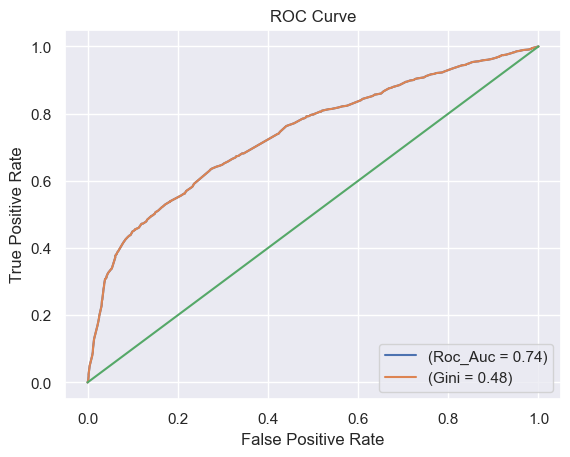

In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = base_model.predict_proba(x_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

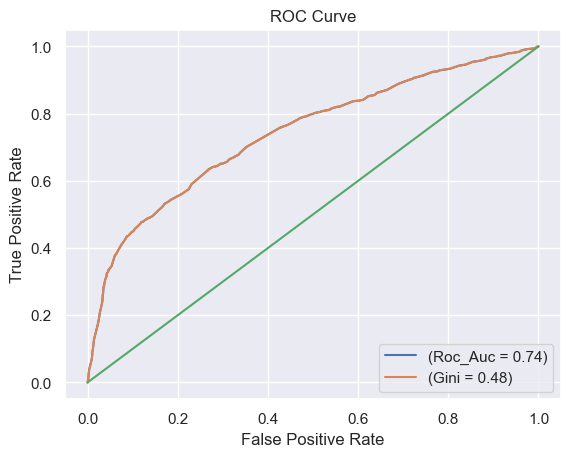

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model.predict_proba(x_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

## Checking

In [81]:
data.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,default
0,20000.0,1.5,1.5,-1.0,-1.0,-2.0,1
1,120000.0,-1.0,1.5,0.0,0.0,1.5,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0


In [82]:
data_new = {
        'LIMIT_BAL': [10000,12000, 54000, 6000],
       'PAY_0': [1, 2, 4, 0]}
 
# Create DataFrame
data_new = pd.DataFrame(data_new)

In [83]:
data_new

,LIMIT_BAL,PAY_0
0,10000,1
1,12000,2
2,54000,4
3,6000,0


In [84]:
target=optimized_model.predict(data_new)
probability=optimized_model.predict_proba(data_new)[:,1]

In [85]:
target

array([0, 1, 1, 0], dtype=int64)

In [86]:
probability

array([0.02492815, 0.74346953, 0.74346953, 0.07510769])

In [87]:
data_new['Predicted_target'] = target
data_new['Predicted_probabilty'] = probability

In [88]:
data_new

,LIMIT_BAL,PAY_0,Predicted_target,Predicted_probabilty
0,10000,1,0,0.024928
1,12000,2,1,0.743470
2,54000,4,1,0.743470
3,6000,0,0,0.075108


# SVM

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [90]:
data.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,default
0,20000.0,1.5,1.5,-1.0,-1.0,-2.0,1
1,120000.0,-1.0,1.5,0.0,0.0,1.5,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0


In [91]:
data.corr()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,default
LIMIT_BAL,1.000000,-0.281256,-0.308840,-0.296653,-0.275536,-0.237806,-0.154380
PAY_0,-0.281256,1.000000,0.645076,0.559973,0.528837,0.476768,0.291685
PAY_2,-0.308840,0.645076,1.000000,0.786833,0.694651,0.615124,0.235276
PAY_3,-0.296653,0.559973,0.786833,1.000000,0.792073,0.653343,0.208608
PAY_4,-0.275536,0.528837,0.694651,0.792073,1.000000,0.719471,0.186960
PAY_6,-0.237806,0.476768,0.615124,0.653343,0.719471,1.000000,0.156596
default,-0.154380,0.291685,0.235276,0.208608,0.186960,0.156596,1.000000


In [92]:
inputs = data[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6']]

targets = data[['default']]

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
x_scaled = scaler.transform(inputs)

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [95]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
sns.set()

In [96]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    cm = confusion_matrix(y_test, y_pred)
    print('Model Performance')
    print('Accuracy is', accuracy)
    print('CM', cm)
    return accuracy
    return cm

In [97]:
base_model = svm.SVC()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance
Accuracy is 78.22222222222223
CM [[7040    0]
 [1960    0]]


In [98]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['poly', 'rbf', 'sigmoid']
# kernel trick

gamma = ['scale', 'auto'] 
#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma
#if ‘auto’, uses 1 / n_features.

C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
# Must be strictly positive.

#epsilon = [0.1 , 0.01, 0.001, 0.0001]


# Create the random grid
random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C}
print(random_grid)

{'kernel': ['poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0]}


In [99]:
#svc_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 2, cv = 3, verbose=1, n_jobs = -1)
#svc_random.fit(X_train, y_train)

In [100]:
#svc_random.best_params_

In [101]:
#optimized_model = svc_random.best_estimator_
#optmized_accuracy = evaluate(optimized_model, X_test, y_test)

# KNN - k-Nearest Neighbors classifier

In [103]:
data.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,default
0,20000.0,1.5,1.5,-1.0,-1.0,-2.0,1
1,120000.0,-1.0,1.5,0.0,0.0,1.5,1
2,90000.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,-1.0,0.0,-1.0,0.0,0.0,0


In [122]:
data.columns

Index(['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6', 'default'], dtype='object')

In [123]:
X = data[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_6']]
y = data['default']

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 0)

In [126]:
from sklearn import metrics

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = (metrics.r2_score(y_test, y_pred))*100
    print('Model Performance')
    print('rmse is', rmse)
    print('Accuracy is', r2.round(4), '%')
    
    return rmse
    return r2

In [128]:
from sklearn.neighbors import KNeighborsRegressor

base_model = KNeighborsRegressor()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
rmse is 0.3941235001028654
Accuracy is 8.3247 %


In [110]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    
    return gini_pred
    return gini_prob

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model Performance
Gini pred is 30.90635400458803
Gini prob is 43.202627762164305


In [112]:
from sklearn import neighbors

auc_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y1_pred=model.predict_proba(X_test)[:,1] #make prediction on test set
    
    auc = roc_auc_score(y_test,y1_pred) #calculate rmse
    auc_val.append(auc) #store rmse values
    
    print('AUC score for k= ' , K , 'is:', auc)

    

max_auc = max(auc_val)
max_auc_index = auc_val.index(max_auc) + 1

print('-------------------------------------')
print('Optimal Neighbor is ',max_auc_index,' max AUC is', max_auc) 

AUC score for k=  1 is: 0.6229160966334748
AUC score for k=  2 is: 0.6640075864894388
AUC score for k=  3 is: 0.6842290170269767
AUC score for k=  4 is: 0.7066880652140376
AUC score for k=  5 is: 0.7160131388108215
AUC score for k=  6 is: 0.7204860789492624
AUC score for k=  7 is: 0.7256378128365382
AUC score for k=  8 is: 0.7276326352820941
AUC score for k=  9 is: 0.7305173242820944
AUC score for k=  10 is: 0.7364044932031277
AUC score for k=  11 is: 0.7370487775728709
AUC score for k=  12 is: 0.7394157439164719
AUC score for k=  13 is: 0.7380866819863172
AUC score for k=  14 is: 0.7413927788673416
AUC score for k=  15 is: 0.7393421348370788
AUC score for k=  16 is: 0.7411616234064413
AUC score for k=  17 is: 0.7411890833636758
AUC score for k=  18 is: 0.741916731245382
AUC score for k=  19 is: 0.742616427349724
AUC score for k=  20 is: 0.7439722115069188
-------------------------------------
Optimal Neighbor is  20  max AUC is 0.7439722115069188


In [113]:
max_auc_model = KNeighborsClassifier(n_neighbors=20)
max_auc_model.fit(X_train, y_train)
max_auc_accuracy = evaluate(max_auc_model, X_test, y_test)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model Performance
Gini pred is 28.552666804485582
Gini prob is 48.79444230138377


In [130]:
min_rmse_model = KNeighborsRegressor(n_neighbors=20)
min_rmse_model.fit(X_train, y_train)
min_rmse_accuracy = evaluate(min_rmse_model, X_test, y_test)

Model Performance
rmse is 0.37308455252574224
Accuracy is 17.851 %


In [131]:
from sklearn.model_selection import RandomizedSearchCV

neighbors = [int(x) for x in np.linspace(start = 1, stop = 30, num = 30)]
weight  = ['uniform','distance']


# Create the random grid
random_grid = {'n_neighbors': neighbors,
               'weights': weight}
print(random_grid)

knn_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, n_jobs = -1)
# Fit the random search model
knn_random.fit(X_train, y_train)

knn_random.best_params_

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
Fitting 3 folds for each of 60 candidates, totalling 180 fits


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'weights': 'uniform', 'n_neighbors': 30}

In [132]:
optimized_model = knn_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, X_test, y_test)

Model Performance
rmse is 0.369522965757505
Accuracy is 19.412 %


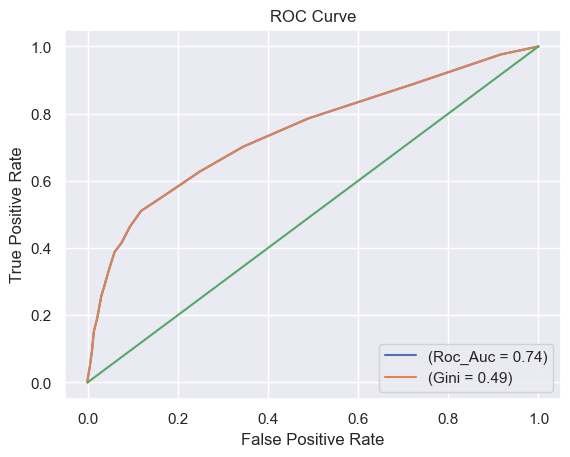

In [133]:
from sklearn.metrics import roc_curve
y_prob = max_auc_model.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()